<a href="https://colab.research.google.com/github/nikhil-r0/GDSC_solution/blob/main/Inflation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
%matplotlib inline
sns.set_style("darkgrid")
import sklearn
from sklearn.metrics import mean_squared_error

**Loading the data into the program**

In [39]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datafile.csv')
data.head()

,Sector,Year,Name,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chattisgarh,Delhi,Goa,...,Uttar Pradesh,Uttarakhand,West Bengal,Andaman and Nicobar,Chandigarh,Dadra and Nagar Haveli,Daman and Diu,Jammu and Kashmir,Lakshadweep,Puducherry
0,Rural,2011,January,104.0,NaN,104.0,NaN,105.0,NaN,103.0,...,103.0,NaN,104.0,105.0,104.0,104.0,103.0,104.0,103.0,106.0
1,Urban,2011,January,103.0,NaN,103.0,NaN,104.0,NaN,103.0,...,103.0,NaN,104.0,105.0,103.0,104.0,103.0,104.0,102.0,105.0
2,Rural+Urban,2011,January,103.0,NaN,104.0,NaN,104.0,NaN,103.0,...,103.0,NaN,104.0,106.0,103.0,104.0,104.0,104.0,104.0,104.0
3,Rural,2011,February,107.0,NaN,105.0,NaN,107.0,NaN,105.0,...,104.0,NaN,107.0,105.0,104.0,107.0,104.0,105.0,104.0,107.0
4,Urban,2011,February,106.0,NaN,106.0,NaN,106.0,NaN,105.0,...,105.0,NaN,108.0,104.0,103.0,106.0,104.0,105.0,105.0,108.0


In [40]:
data.tail()

,Sector,Year,Name,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chattisgarh,Delhi,Goa,...,Uttar Pradesh,Uttarakhand,West Bengal,Andaman and Nicobar,Chandigarh,Dadra and Nagar Haveli,Daman and Diu,Jammu and Kashmir,Lakshadweep,Puducherry
435,Rural,2023,March,181.1,182.6,178.4,172.4,168.4,166.0,170.8,...,176.1,175.2,182.7,197.2,175.3,164.7,180.8,187.1,186.5,184.9
436,Urban,2023,March,183.7,NaN,175.2,178.9,166.9,165.6,170.2,...,177.4,177.7,181.8,176.1,166.0,170.2,173.3,185.9,171.5,181.6
437,Rural+Urban,2023,March,182.1,182.6,177.7,173.3,167.8,165.6,170.4,...,176.6,176.1,182.3,186.5,166.5,168.4,177.7,186.7,178.8,182.4
438,Rural,2023,April,181.5,183.1,179.5,172.7,168.7,166.1,173.7,...,176.5,175.9,183.2,193.6,178.8,166.0,180.8,187.9,186.8,187.6
439,Urban,2023,April,NaN,NaN,177.2,180.1,167.6,165.6,170.2,...,178.2,179.2,183.5,178.2,167.8,172.3,177.2,187.9,176.2,183.2


In [41]:
data.shape

(440, 39)

In [42]:
data_ka = data[['Sector','Year','Name','Karnataka']]
data_ka.head()

,Sector,Year,Name,Karnataka
0,Rural,2011,January,104.0
1,Urban,2011,January,104.0
2,Rural+Urban,2011,January,104.0
3,Rural,2011,February,106.0
4,Urban,2011,February,108.0


In [43]:
data_ka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sector     440 non-null    object 
 1   Year       440 non-null    int64  
 2   Name       440 non-null    object 
 3   Karnataka  431 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 13.9+ KB


In [44]:
data_ka.describe()

,Year,Karnataka
count,440.000000,431.000000
mean,2016.645455,142.123968
std,3.566706,20.176977
min,2011.000000,6.810000
25%,2014.000000,129.850000
50%,2017.000000,140.100000
75%,2020.000000,154.100000
max,2023.000000,185.500000


**Missing Data**

In [45]:
data_ka.isnull().sum()

Sector       0
Year         0
Name         0
Karnataka    9
dtype: int64

In [46]:
data_ka[data_ka['Karnataka'].isnull()]

,Sector,Year,Name,Karnataka
363,Rural,2021,March,NaN
364,Urban,2021,March,NaN
365,Rural+Urban,2021,March,NaN
366,Rural,2021,April,NaN
367,Urban,2021,April,NaN
368,Rural+Urban,2021,April,NaN
369,Rural,2021,May,NaN
370,Urban,2021,May,NaN
371,Rural+Urban,2021,May,NaN


**Outliers**

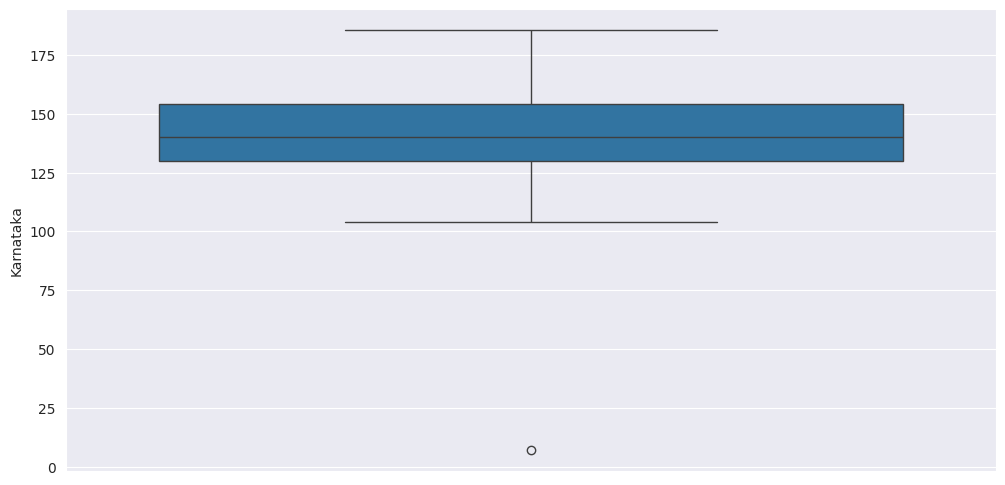

In [47]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Karnataka'])
plt.show()

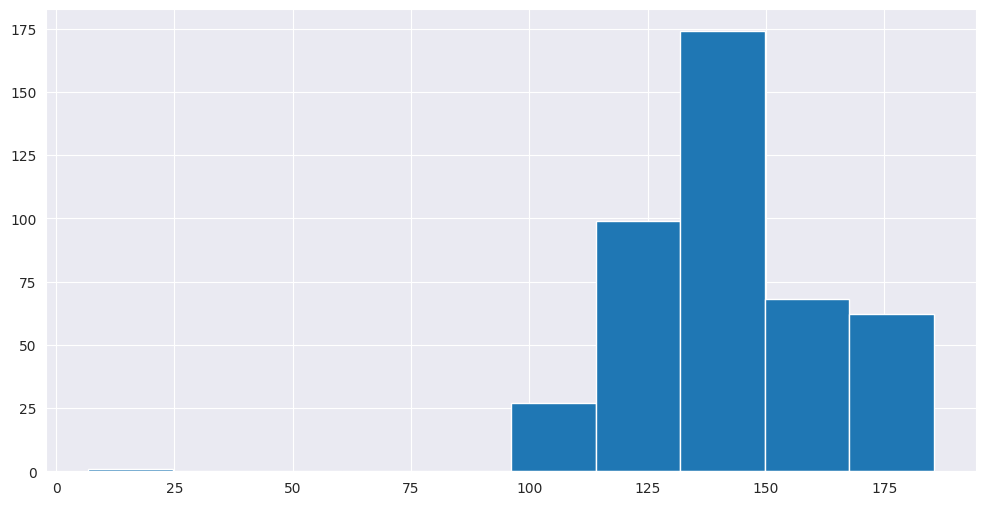

In [48]:
plt.figure(figsize= (12,6))
plt.hist(data ['Karnataka'])
plt.show()

In [49]:
data_ka[data_ka['Karnataka'] < 25]

,Sector,Year,Name,Karnataka
388,Urban,2021,November,6.81


In [50]:
data_ka.loc[386:390]

,Sector,Year,Name,Karnataka
386,Rural+Urban,2021,October,170.00
387,Rural,2021,November,168.00
388,Urban,2021,November,6.81
389,Rural+Urban,2021,November,171.10
390,Rural,2021,December,168.90


In [51]:
data_ka.loc[388,'Karnataka'] = (data_ka.loc[386,'Karnataka'] + data_ka.loc[390,'Karnataka'])/2
data_ka.loc[386:390]

,Sector,Year,Name,Karnataka
386,Rural+Urban,2021,October,170.00
387,Rural,2021,November,168.00
388,Urban,2021,November,169.45
389,Rural+Urban,2021,November,171.10
390,Rural,2021,December,168.90


**Filling the missing value**

In [52]:
data_ka['Karnataka'].fillna(np.nanmedian(data_ka['Karnataka']),inplace = True)
np.nanmedian(data_ka['Karnataka'])

<ipython-input-52-f7c227f5ccb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ka['Karnataka'].fillna(np.nanmedian(data_ka['Karnataka']),inplace = True)


140.1

In [53]:
data_ka.isnull().sum()

Sector       0
Year         0
Name         0
Karnataka    0
dtype: int64

In [54]:
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
data_ka['Name'] = data_ka['Name'].map(month_map)
data_ka

<ipython-input-54-6e7ceb1f87b7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ka['Name'] = data_ka['Name'].map(month_map)


,Sector,Year,Name,Karnataka
0,Rural,2011,1.0,104.0
1,Urban,2011,1.0,104.0
2,Rural+Urban,2011,1.0,104.0
3,Rural,2011,2.0,106.0
4,Urban,2011,2.0,108.0
...,...,...,...,...
435,Rural,2023,3.0,178.5
436,Urban,2023,3.0,184.2
437,Rural+Urban,2023,3.0,181.6
438,Rural,2023,4.0,178.9


In [55]:
96,97,98,104,116,281,416
data_ka.loc[96,'Name'] = 8
data_ka.loc[97,'Name'] = 8
data_ka.loc[98,'Name'] = 8
data_ka.loc[104,'Name'] = 11
data_ka.loc[116,'Name'] = 3
data_ka.loc[281,'Name'] = 10
data_ka.loc[416,'Name'] = 8

In [56]:
data_ka.isnull().sum()
data_ka[data_ka['Name'].isnull()]

,Sector,Year,Name,Karnataka


In [57]:
from datetime import datetime
data_ka['Date'] = data_ka.apply(lambda row: datetime.strptime(f"{int(row.Year)}/{int(row.Name)}/{int(1)}", '%Y/%m/%d'), axis = 1)
data_ka['Date'] = pd.to_datetime(data_ka['Date'], errors='coerce')
data_ka.head()

<ipython-input-57-4ac23d53c65b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ka['Date'] = data_ka.apply(lambda row: datetime.strptime(f"{int(row.Year)}/{int(row.Name)}/{int(1)}", '%Y/%m/%d'), axis = 1)
<ipython-input-57-4ac23d53c65b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ka['Date'] = pd.to_datetime(data_ka['Date'], errors='coerce')


,Sector,Year,Name,Karnataka,Date
0,Rural,2011,1.0,104.0,2011-01-01
1,Urban,2011,1.0,104.0,2011-01-01
2,Rural+Urban,2011,1.0,104.0,2011-01-01
3,Rural,2011,2.0,106.0,2011-02-01
4,Urban,2011,2.0,108.0,2011-02-01


In [58]:
data1 = data_ka.groupby(['Date'])['Karnataka'].median().reset_index()
data1.head()

,Date,Karnataka
0,2011-01-01,104.0
1,2011-02-01,106.0
2,2011-03-01,105.4
3,2011-04-01,107.0
4,2011-05-01,109.3


**Time series decomposition**

In [59]:
data1 = pd.DataFrame(data1)
data1 = data1.set_index(['Date'])
data1.head()
data1.tail()

,Karnataka
Date,
2022-12-01,178.9
2023-01-01,180.0
2023-02-01,181.1
2023-03-01,181.6
2023-04-01,182.2


In [60]:
data1.index.dtype

dtype('<M8[ns]')

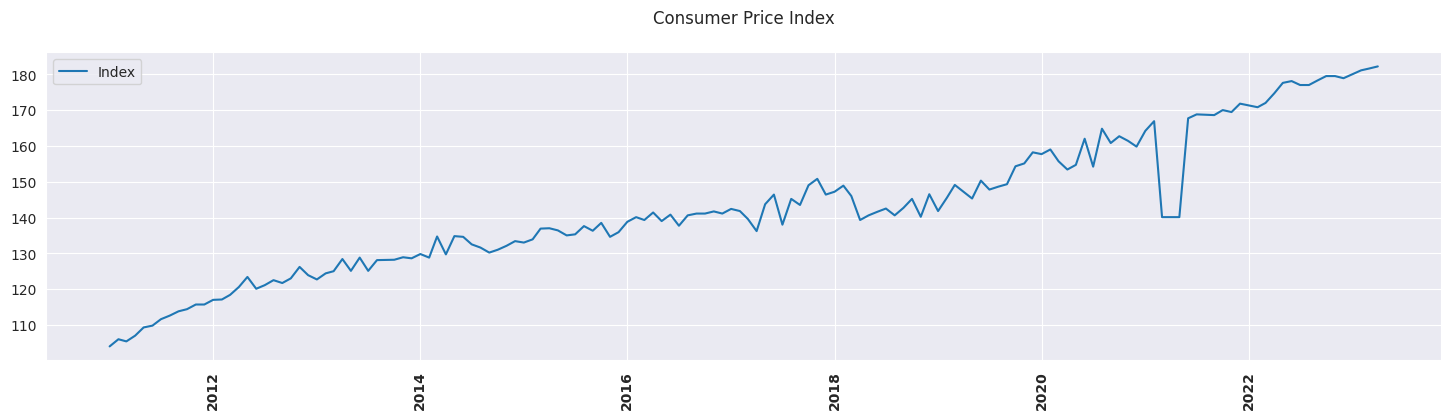

In [61]:
plt.figure(figsize = (18,4))
plt.plot(data1, label = 'Index')
plt.legend(loc = 'best')
plt.title('Consumer Price Index\n')
plt.xticks(rotation = 90, fontweight = 'bold')
plt.show()


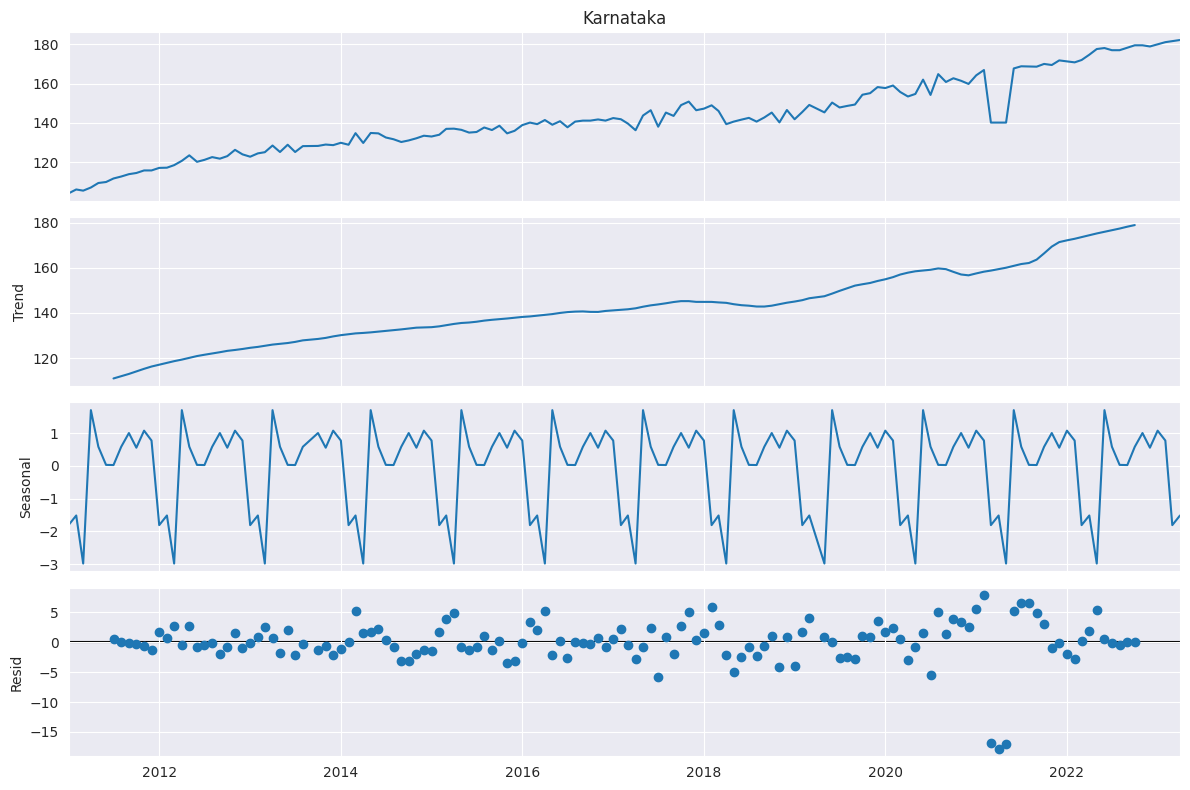

In [62]:
from pylab import rcParams
from scipy.fftpack import fftfreq
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data1['Karnataka'],model = 'additive',period = 12)
fig = decomposition.plot()
plt.show()

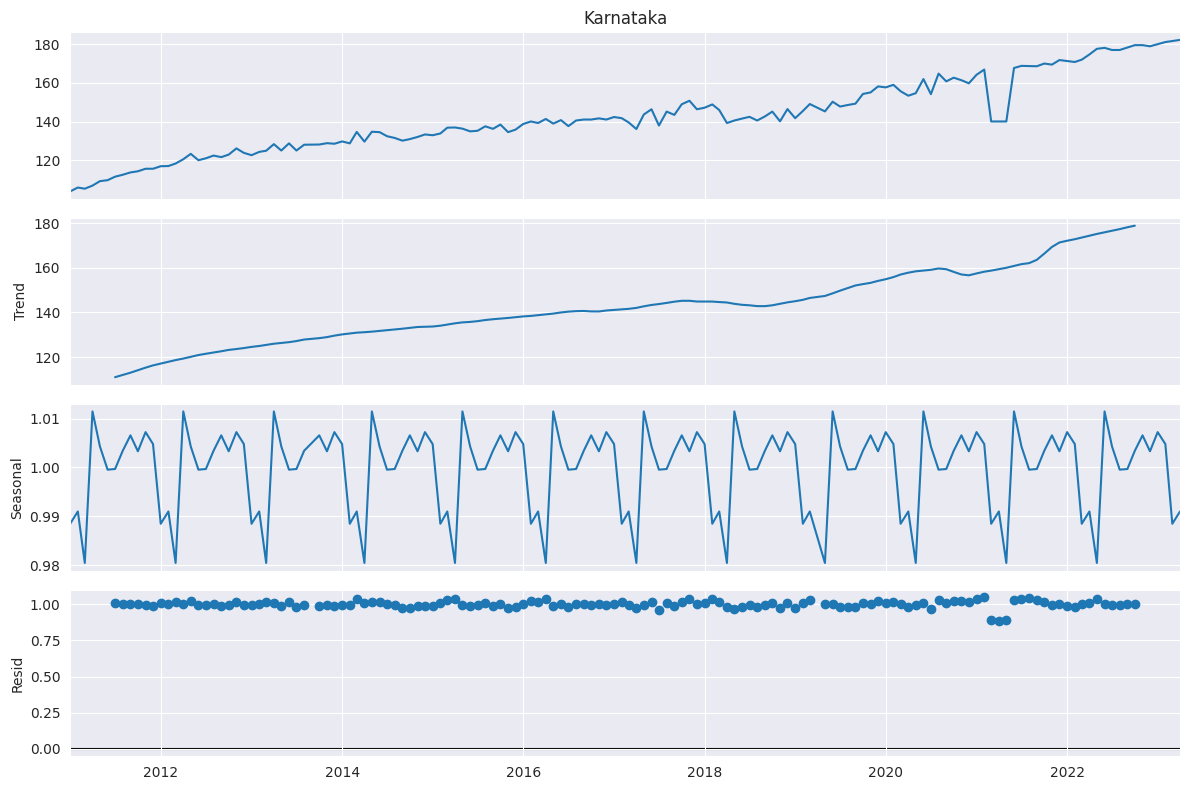

In [63]:
from pylab import rcParams
from scipy.fftpack import fftfreq
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data1['Karnataka'],model = 'multiplicative',period = 12)
fig = decomposition.plot()
plt.show()

**Since the residual is closer to 1, it is not multiplicative**

**Split data into train and test sets**

In [64]:
train_len = 122
train = data1[0 : train_len]
test = data1[train_len : ]
train.head()

,Karnataka
Date,
2011-01-01,104.0
2011-02-01,106.0
2011-03-01,105.4
2011-04-01,107.0
2011-05-01,109.3


**ADF test**

In [65]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data1['Karnataka'])
print('p_value: %f' %adf_test[1])

p_value: 0.955591


**Since the p value is greater than 0.05 the series is not stationary.**

**BoxCox Tranformation**

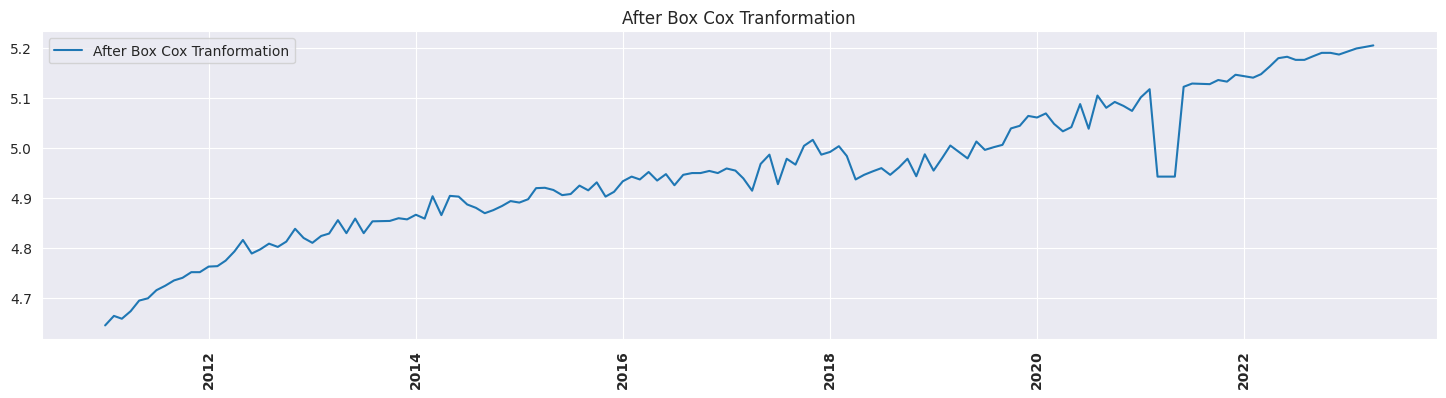

In [66]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data1['Karnataka'], lmbda = 0), index = data1.index)
plt.figure(figsize = (18,4))
plt.plot(data_boxcox, label = 'After Box Cox Tranformation')
plt.legend(loc = 'best')
plt.title('After Box Cox Tranformation')
plt.xticks(rotation = 90, fontweight = 'bold')
plt.show()


**Differencing to remove the trend**

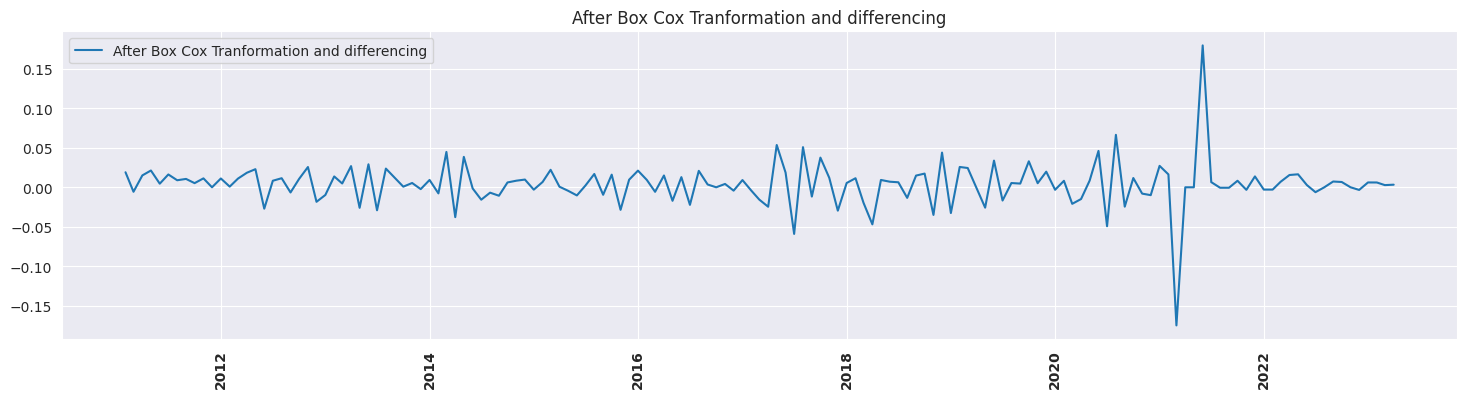

In [67]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data1.index)
plt.figure(figsize = (18,4))
plt.plot(data_boxcox_diff, label = 'After Box Cox Tranformation and differencing')
plt.legend(loc = 'best')
plt.title('After Box Cox Tranformation and differencing')
plt.xticks(rotation = 90, fontweight = 'bold')
plt.show()

In [68]:
data_boxcox_diff.dropna(inplace = True)

**Redoing the ADF test**

In [69]:
adf_test_2 = adfuller(data_boxcox_diff)
print('p_value: %f' %adf_test_2[1])

p_value: 0.000000


**As p value is less than 0.05 the series is stationary**

**Train test split**

In [70]:
train_data_boscox = data_boxcox[:train_len]
test_data_boscox = data_boxcox[train_len:]
train_data_boscox_diff = data_boxcox_diff[:train_len]
test_data_boscox_diff = data_boxcox_diff[train_len:]

**ARIMA models**

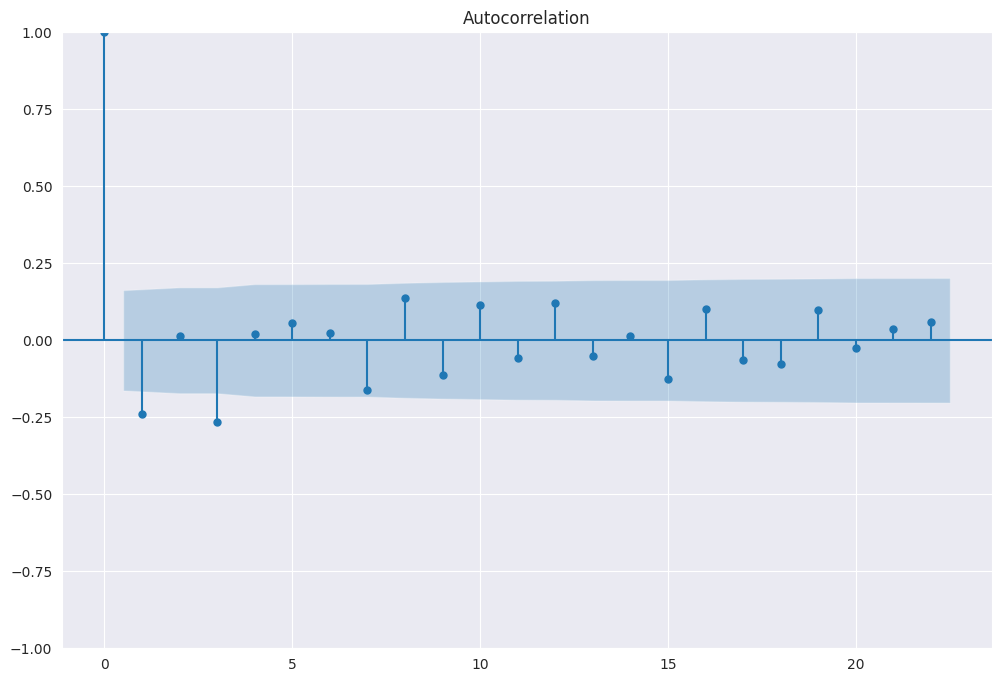

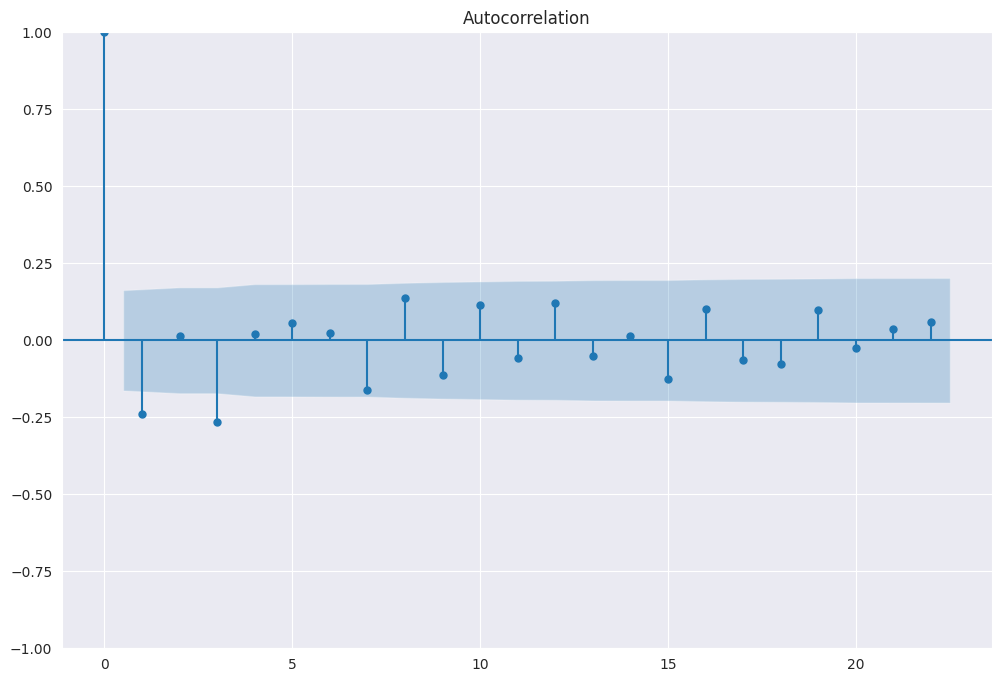

In [71]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_boxcox_diff)

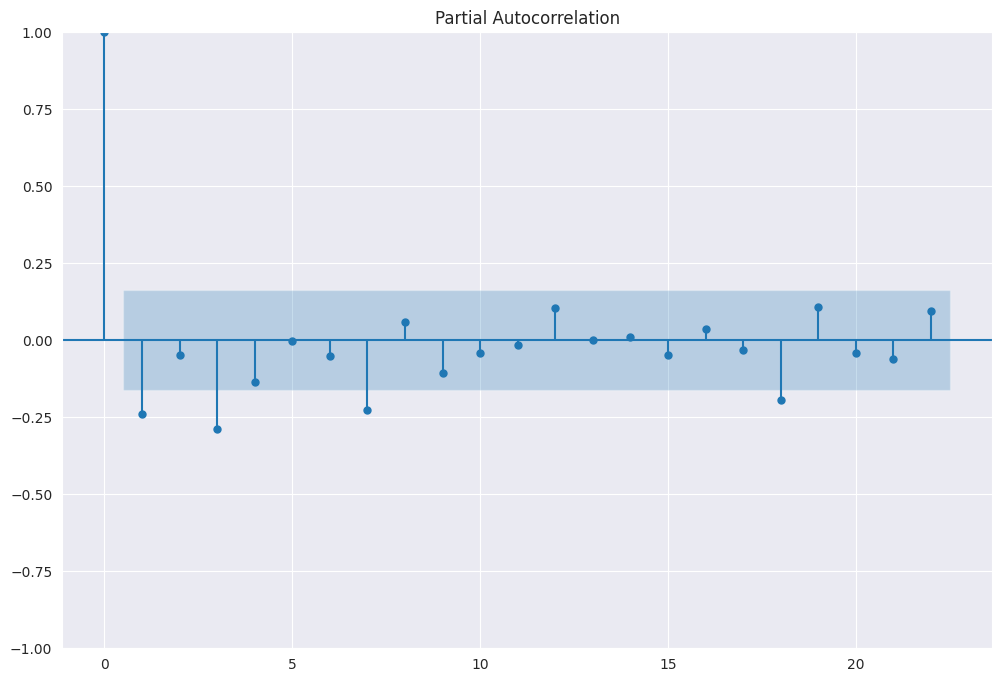

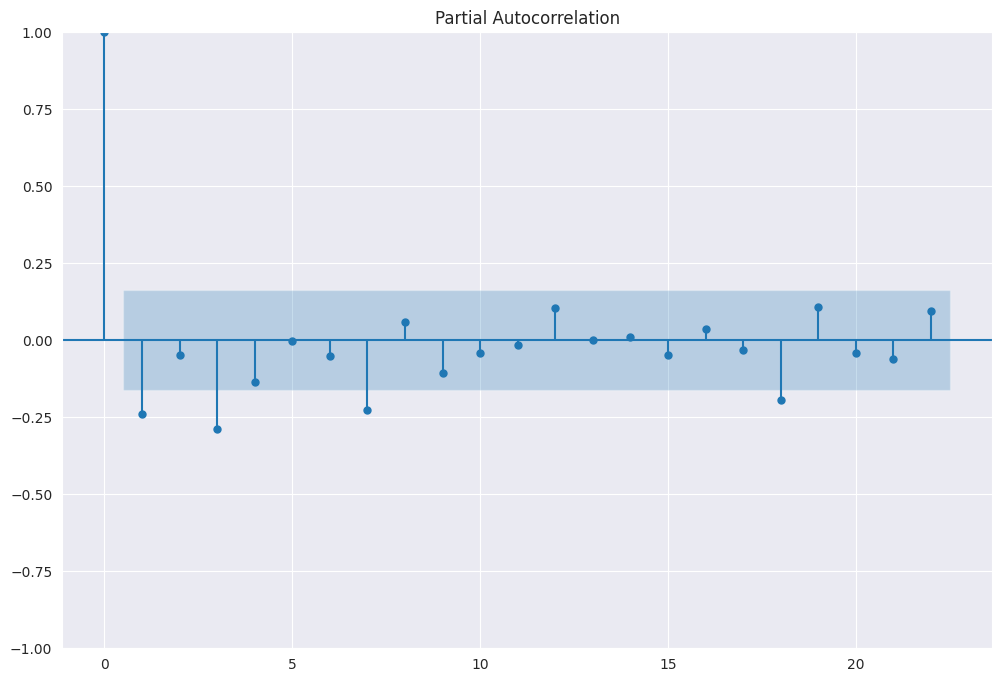

In [72]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_boxcox_diff)

In [73]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_boxcox_diff , order = (2,1,9))
model_fit = model.fit()

import warnings
warnings.filterwarnings('ignore')
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  145
Model:                 ARIMA(2, 1, 9)   Log Likelihood                 318.963
Date:                Thu, 22 Feb 2024   AIC                           -613.927
Time:                        17:39:03   BIC                           -578.289
Sample:                             0   HQIC                          -599.445
                                - 145                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5291      0.747     -2.046      0.041      -2.994      -0.064
ar.L2         -0.7916      0.598     -1.325      0.185      -1.963       0.380
ma.L1          0.2412      0.737      0.327      0.744      -1.204       1.686
ma.L2         -0.9010      0.494     -1.825      0.068      -1.869       0.067
ma.L3         -0.9215      0.591     -1.560      0.119      -2.079       0.236
ma.L4          0.0295      0.219      0.135      0.893      -0.400       0.459
ma.L5          0.3601      0.165      2.176      0.030       0.036       0.685
ma.L6          0.3322      0.305      1.090      0.276      -0.265       0.930
ma.L7         -0.0974      0.176     -0.553      0.581      -0.443       0.248
ma.L8         -0.0272      0.156     -0.175      0.861      -0.332       0.278
ma.L9          0.0288      0.143      0.201      0.840      -0.251       0.309
sigma2         0.0007   5.65e-05     11.886      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              1072.94
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               4.90   Skew:                            -1.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
#Recover original time series
y_hat_ar =  data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

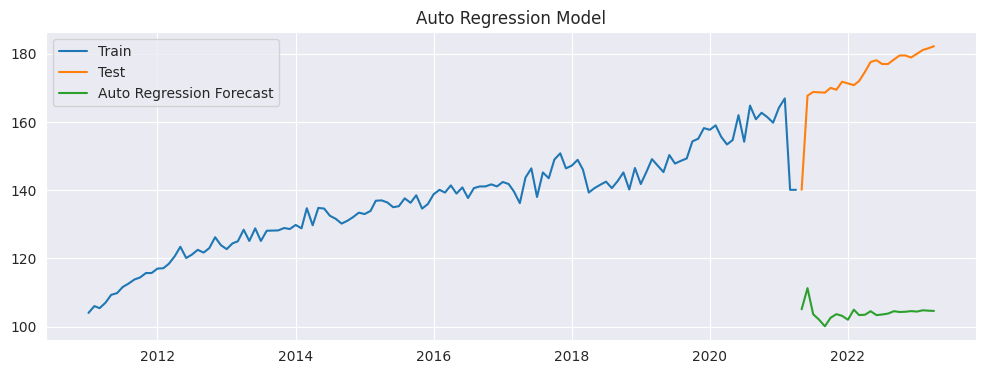

In [77]:
plt.figure(figsize = (12,4))
plt.plot(train['Karnataka'], label = 'Train')
plt.plot(test['Karnataka'], label = 'Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label = 'Auto Regression Forecast')
plt.legend(loc = 'best')
plt.title('Auto Regression Model')
plt.show()

In [80]:
future_predict = model_fit.predict(start = len(data1), end = len(data1) + 24)
future_predict = future_predict.cumsum()
future_predict = future_predict.add(data_boxcox[0])
future_predict = np.exp(future_predict)
future_predict

146    104.614157
147    105.261365
148    105.551954
149    106.139628
150    106.529387
151    107.022925
152    107.517711
153    107.927465
154    108.473667
155    108.885092
156    109.401445
157    109.871222
158    110.335714
159    110.852523
160    111.300237
161    111.819347
162    112.291079
163    112.785685
164    113.290154
165    113.768397
166    114.286261
167    114.771471
168    115.282473
169    115.787255
170    116.288339
Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'Next 24 months prediction\n')

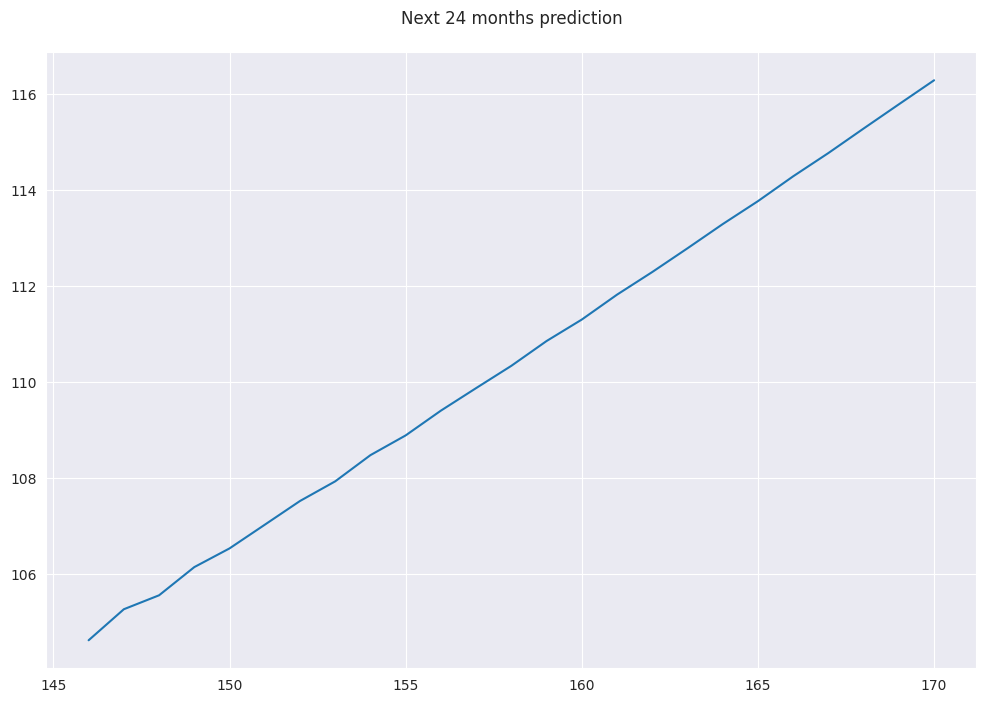

In [82]:
future_predict.plot()
plt.title('Next 24 months prediction\n')

**Conclusion**

**The Consumer price Index is highly fluctuating and on a increasing trend with this dataset based on a base year of 2012**


*  CPI compared to 2012 is 80% higher or in other words the cost of living in India is 80% higher compared to 2012.

*  The Poverty Line in India is based on a survey conducted in 2006 and is an highly unreliable point of reference as such.

- Hence we suggest a machine learning based system for determining the poverty line while understanding the multidimensionality of poverty.
